In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# yob1880是指1880年出生的婴儿的姓名统计
names1880=pd.read_csv("/Users/dengsudden/Documents/python_course/names/yob1880.txt",names=["name","sex","births"])
names1880.head(10)

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [4]:
#统计1880年出生的男女婴儿数
names1880.groupby(by=["sex"]).births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

## 聚合1880到2016年间所有的婴儿姓名统计表格，
## 统计同名字的婴儿数／统计男女婴儿数

In [5]:
'''为了便于统计从1880年到2016年这段时间内所有婴儿的姓名，
需要将names文件夹中所有的yob%year.txt文件合到一个DataFrame中
可通过pandas.concat实现'''
years = range(1880,2017) #从1880到2016年
pieces = []

for year in years:
    path = "/Users/dengsudden/Documents/python_course/names/yob%d.txt" %year
    frame = pd.read_csv(path,names=["name","sex","births"])
    frame["year"] = year #给frame表格增加一个“year”列，并将year值分别赋给此列
    pieces.append(frame) #pieces是列表类型，使用append函数将frame接入pieces，作为pieces的一个元素

names = pd.concat(pieces,ignore_index=True) #将pieces中各元素作为DataFrame names的各行，聚合起来，组成一个大的DataFrame
names.head(10)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


### 统计1880到2016年间，同一名字的婴儿数，按降序排列[标杆语句]

In [6]:
names.groupby("name").agg({"births":sum}).sort_values(by=["births"],ascending=0).head(10)

,births
name,
James,5159306
John,5127501
Robert,4829274
Michael,4359820
Mary,4135851
William,4103456
David,3613916
Joseph,2603475
Richard,2570304


## 统计每年出生的男女婴儿数，用折线图反应男女婴儿出生数趋势

In [7]:
#分别统计每年出生的男女婴儿数
year_total_births = names.pivot_table(index="year",columns="sex",values="births",aggfunc=sum)
year_total_births.head(10)

sex,F,M
year,,
1880,90992,110491
1881,91953,100743
1882,107847,113686
1883,112318,104627
1884,129020,114443
1885,133055,107799
1886,144533,110784
1887,145981,101415
1888,178624,120851


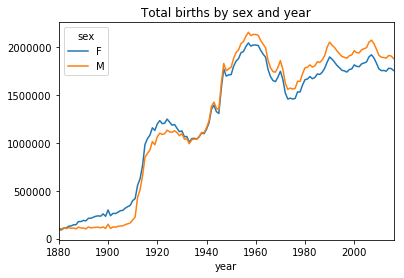

In [8]:
year_total_births.plot(title="Total births by sex and year")
plt.show()
plt.close() #加上这条语句，才不会出现多张同样的图

## 命名趋势分析

In [9]:
# 按年/性别分组数据，并按照名字出现次数，给每组数据中的名字排名
names["ranked"] = names.groupby(["year","sex"]).births.rank(ascending=0)
names.head(10)

,name,sex,births,year,ranked
0,Mary,F,7065,1880,1.0
1,Anna,F,2604,1880,2.0
2,Emma,F,2003,1880,3.0
3,Elizabeth,F,1939,1880,4.0
4,Minnie,F,1746,1880,5.0
5,Margaret,F,1578,1880,6.0
6,Ida,F,1472,1880,7.0
7,Alice,F,1414,1880,8.0
8,Bertha,F,1320,1880,9.0
9,Sarah,F,1288,1880,10.0


In [10]:
# 自定义函数，计算每年各性别下，各名字出现次数占当组总次数的比例
def add_pct(group):
    group["pct"] = group.births/group.births.sum()*100
    return group

names = names.groupby(["year","sex"]).apply(add_pct) # apply(自定义函数)函数表示直接使用自定义函数
names.head(10)

,name,sex,births,year,ranked,pct
0,Mary,F,7065,1880,1.0,7.764419
1,Anna,F,2604,1880,2.0,2.861790
2,Emma,F,2003,1880,3.0,2.201292
3,Elizabeth,F,1939,1880,4.0,2.130957
4,Minnie,F,1746,1880,5.0,1.918850
5,Margaret,F,1578,1880,6.0,1.734218
6,Ida,F,1472,1880,7.0,1.617725
7,Alice,F,1414,1880,8.0,1.553983
8,Bertha,F,1320,1880,9.0,1.450677
9,Sarah,F,1288,1880,10.0,1.415509


### 检查语句。检查各分组下的占比之和是否为100%。调用函数np.allclose()

In [11]:
np.allclose(names.groupby(["year","sex"]).pct.sum(),100)

True

In [12]:
boys = names[names.sex=="M"]
girls = names[names.sex=="F"]

In [13]:
rank1m = boys[boys.ranked==1]
rank1f = girls[girls.ranked==1]

## 用matplotlib.pyplot (plt) 作图标准示例

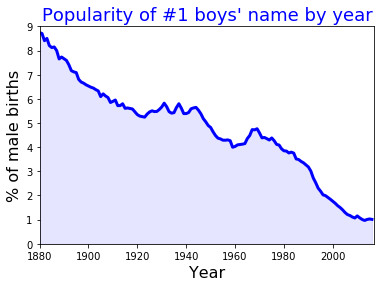

In [14]:
#画出每年最热门的名字占总男生出生数比例变化曲线
plt.plot(rank1m.year,rank1m.pct,color="blue",linewidth=3,label="Boys") 
plt.fill_between(rank1m.year,rank1m.pct,color="blue",alpha= 0.1,interpolate=True)
plt.xlim(1880,2017)
plt.ylim(0,9)
plt.title("Popularity of #1 boys' name by year",color="blue",size=18)
plt.xlabel("Year",size=16)
plt.ylabel("% of male births",size=16)
plt.show()
plt.close()

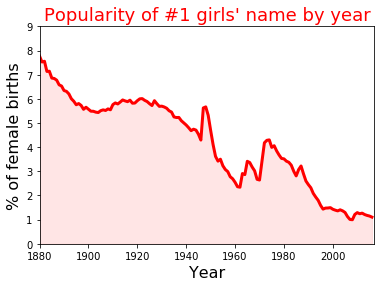

In [15]:
#画出每年最热门的名字占总女生出生数比例变化曲线
plt.plot(rank1f.year,rank1f.pct,color="red",linewidth=3,label="Girls") 
plt.fill_between(rank1f.year,rank1f.pct,color="red",alpha= 0.1,interpolate=True)
plt.xlim(1880,2017)
plt.ylim(0,9)
plt.title("Popularity of #1 girls' name by year",color="red",size=18)
plt.xlabel("Year",size=16)
plt.ylabel("% of female births",size=16)
plt.show()
plt.close()

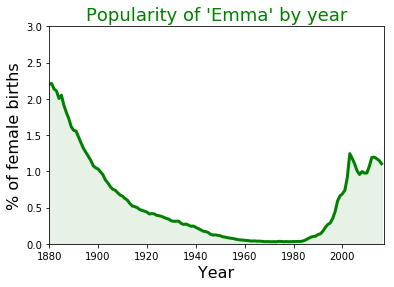

In [16]:
#画出每年名字“Emma”出现次数占总女生出生数比例变化曲线
g_name = girls[girls.name=="Emma"]
plt.plot(g_name.year,g_name.pct,color="green",linewidth=3,label="Emma") 
plt.fill_between(g_name.year,g_name.pct,color="green",alpha= 0.1,interpolate=True)
plt.xlim(1880,2017)
plt.ylim(0,3)
plt.title("Popularity of 'Emma' by year",color="green",size=18)
plt.xlabel("Year",size=16)
plt.ylabel("% of female births",size=16)
plt.show()
plt.close()

In [17]:
counts = names["year"].value_counts() #统计每年婴儿姓名数
counts.sort_index().head()

1880    2000
1881    1935
1882    2127
1883    2084
1884    2297
Name: year, dtype: int64

In [20]:
subtable = names.reindex(columns=["name","pct"])
subtable

,name,pct
0,Mary,7.764419
1,Anna,2.861790
2,Emma,2.201292
3,Elizabeth,2.130957
4,Minnie,1.918850
5,Margaret,1.734218
6,Ida,1.617725
7,Alice,1.553983
8,Bertha,1.450677
9,Sarah,1.415509
